In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn import metrics

In [3]:
#loading simulated 50x50x50 data
p_sim = sp.sparse.load_npz('../../data/tilt/20x20x20/pDisc_noise_40000_20x20x20_tilt.npz')
C_sim = sp.sparse.load_npz('../../data/tilt/20x20x20/CDisc_noise_40000_20x20x20_tilt.npz')
junk_sim = sp.sparse.load_npz('../../data/tilt/20x20x20/noiseDisc_40000_20x20x20.npz')

#loading real 50x50x50 data
p_0130 = sp.sparse.load_npz('../../data/real/20x20x20/run_0130_pDisc.npz')
C_0130 = sp.sparse.load_npz('../../data/real/20x20x20/run_0130_CDisc.npz')
junk_0130 = sp.sparse.load_npz('../../data/real/20x20x20/run_0130_junkDisc.npz')
p_0210 = sp.sparse.load_npz('../../data/real/20x20x20/run_0210_pDisc.npz')
C_0210 = sp.sparse.load_npz('../../data/real/20x20x20/run_0210_CDisc.npz')
junk_0210 = sp.sparse.load_npz('../../data/real/20x20x20/run_0210_junkDisc.npz')

p_real = sp.sparse.vstack([p_0130, p_0210], format='csr')
C_real = sp.sparse.vstack([C_0130, C_0210], format='csr')
junk_real = sp.sparse.vstack([junk_0130, junk_0210], format='csr')

In [4]:
print(p_real[0].nnz)
print(p_real[0].sum())

213
161.46619999999984


# Simulated Data

In [5]:
p_sim_count = []
p_sim_charge = []

for i in range(p_sim.shape[0]):
    p_sim_count.append(p_sim[i].nnz)
    p_sim_charge.append(p_sim[i].sum())

In [6]:
C_sim_count = []
C_sim_charge = []

for i in range(C_sim.shape[0]):
    C_sim_count.append(C_sim[i].nnz)
    C_sim_charge.append(C_sim[i].sum())

In [7]:
junk_sim_count = []
junk_sim_charge = []

for i in range(junk_sim.shape[0]):
    junk_sim_count.append(junk_sim[i].nnz)
    junk_sim_charge.append(junk_sim[i].sum())

# Real Data

In [8]:
p_real_count = []
p_real_charge = []

for i in range(p_real.shape[0]):
    p_real_count.append(p_real[i].nnz)
    p_real_charge.append(p_real[i].sum())

In [9]:
C_real_count = []
C_real_charge = []

for i in range(C_real.shape[0]):
    C_real_count.append(C_real[i].nnz)
    C_real_charge.append(C_real[i].sum())

In [10]:
junk_real_count = []
junk_real_charge = []

for i in range(junk_real.shape[0]):
    junk_real_count.append(junk_real[i].nnz)
    junk_real_charge.append(junk_real[i].sum())

# Plotting

In [11]:
print("Average point count per simulated proton event = %.2f" % (np.sum(p_sim_count)/len(p_sim_count)))
print("Average charge per simulated proton event = %.2f \n" % (np.sum(p_sim_charge)/len(p_sim_count)))

print("Average point count per simulated carbon event = %.2f" % (np.sum(C_sim_count)/len(C_sim_count)))
print("Average charge per simulated carbon event = %.2f \n" % (np.sum(C_sim_charge)/len(C_sim_count)))

print("Average point count per simulated junk event = %.2f" % (np.sum(junk_sim_count)/len(junk_sim_count)))
print("Average charge per simulated junk event = %.2f \n" % (np.sum(junk_sim_charge)/len(junk_sim_count)))

Average point count per simulated proton event = 179.04
Average charge per simulated proton event = 367.11 

Average point count per simulated carbon event = 171.81
Average charge per simulated carbon event = 615.10 

Average point count per simulated junk event = 156.26
Average charge per simulated junk event = 318.10 



In [12]:
print("Average point count per real proton event = %.2f" % (np.sum(p_real_count)/len(p_real_count)))
print("Average charge per real proton event = %.2f \n" % (np.sum(p_real_charge)/len(p_real_count)))

print("Average point count per real carbon event = %.2f" % (np.sum(C_real_count)/len(C_real_count)))
print("Average charge per real carbon event = %.2f \n" % (np.sum(C_real_charge)/len(C_real_count)))

print("Average point count per real junk event = %.2f" % (np.sum(junk_real_count)/len(junk_real_count)))
print("Average charge per real junk event = %.2f \n" % (np.sum(junk_real_charge)/len(junk_real_count)))

Average point count per real proton event = 168.26
Average charge per real proton event = 194.16 

Average point count per real carbon event = 143.16
Average charge per real carbon event = 537.62 

Average point count per real junk event = 174.43
Average charge per real junk event = 164.63 



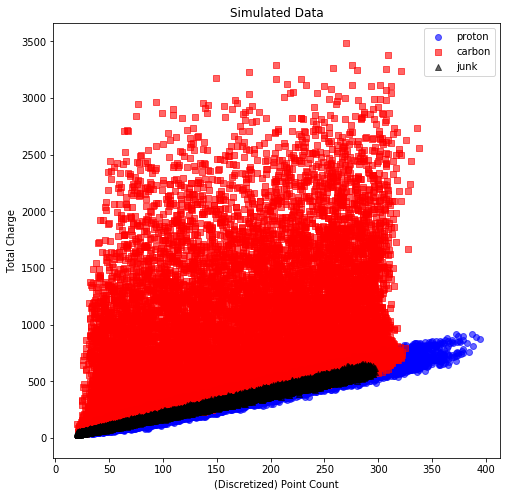

In [17]:
plt.figure(figsize=(8,8))
p = plt.scatter(p_sim_count, p_sim_charge, marker='o', c='blue', alpha=0.6)
C = plt.scatter(C_sim_count, C_sim_charge, marker='s', c='red', alpha=0.6)
junk = plt.scatter(junk_sim_count, junk_sim_charge, marker='^', c='black', alpha=0.6)

plt.title("Simulated Data")
plt.xlabel("(Discretized) Point Count")
plt.ylabel("Total Charge")
plt.legend((p, C, junk), ('proton', 'carbon', 'junk'), loc='upper right')

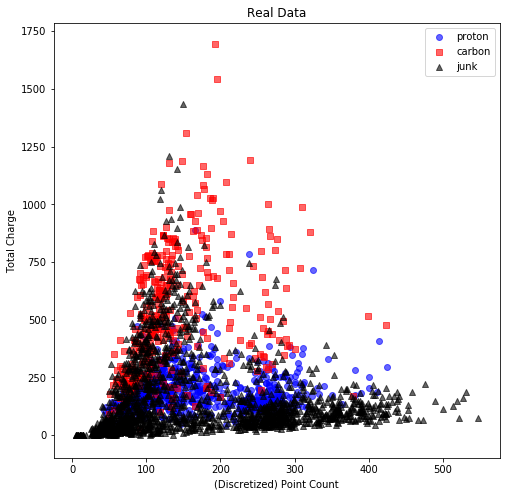

In [19]:
plt.figure(figsize=(8,8))
p = plt.scatter(p_real_count, p_real_charge, marker='o', c='blue', alpha=0.6)
C = plt.scatter(C_real_count, C_real_charge, marker='s', c='red', alpha=0.6)
junk = plt.scatter(junk_real_count, junk_real_charge, marker='^', c='black', alpha=0.6)

plt.title("Real Data")
plt.xlabel("(Discretized) Point Count")
plt.ylabel("Total Charge")
plt.legend((p, C, junk), ('proton', 'carbon', 'junk'), loc='upper right')